You are given the head of a linked list.

Remove every node which has a node with a greater value anywhere to the right side of it.

Return the head of the modified linked list.

 

Example 1:

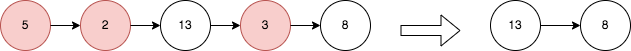

Input: head = [5,2,13,3,8]
Output: [13,8]
Explanation: The nodes that should be removed are 5, 2 and 3.
- Node 13 is to the right of node 5.
- Node 13 is to the right of node 2.
- Node 8 is to the right of node 3.

Example 2:

Input: head = [1,1,1,1]
Output: [1,1,1,1]
Explanation: Every node has value 1, so no nodes are removed.

 

Constraints:

    The number of the nodes in the given list is in the range [1, 105].
    1 <= Node.val <= 105



In [ ]:
# Definition for singly-linked list.
# class ListNode:
#     def __init__(self, val=0, next=None):
#         self.val = val
#         self.next = next
class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        if not head:
            return head

        nodes = []
        while head:
            nodes.append(head)
            head = head.next

        nodes = nodes[::-1]
        p = 0
        curr = nodes[0].val
        while p < len(nodes):
            while p < len(nodes) and nodes[p].val < curr:
                del(nodes[p])
            curr = nodes[p].val if p < len(nodes) else None
            p += 1
            
        nodes = nodes[::-1]
        for p in range(len(nodes) - 1):
            nodes[p].next = nodes[p + 1]
        return nodes[0]
        

In [ ]:
class Solution:
    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        stack = []
        current = head

        # Add nodes to the stack
        while current:
            stack.append(current)
            current = current.next

        current = stack.pop()
        maximum = current.val
        result_list = ListNode(maximum)

        # Remove nodes from the stack and add to result
        while stack:
            current = stack.pop()
            # Current should not be added to the result
            if current.val < maximum:
                continue
            # Add new node with current's value to front of the result
            else:
                new_node = ListNode(current.val)
                new_node.next = result_list
                result_list = new_node
                maximum = current.val

        return result_list

In [ ]:
class Solution:
    def reverse_list(self, head):
        prev = None
        current = head
        next_temp = None

        # Set each node's next pointer to the previous node
        while current:
            next_temp = current.next
            current.next = prev
            prev = current
            current = next_temp
        
        return prev

    def removeNodes(self, head: Optional[ListNode]) -> Optional[ListNode]:
        # Reverse the original linked list
        head = self.reverse_list(head)

        maximum = 0
        prev = None
        current = head

        # Traverse the list deleting nodes
        while current:
            maximum = max(maximum, current.val)

            # Delete nodes that are smaller than maximum
            if current.val < maximum:
                # Delete current by skipping
                prev.next = current.next
                deleted = current
                current = current.next
                deleted.next = None

            # Current does not need to be deleted
            else:
                prev = current
                current = current.next
        
        # Reverse and return the modified linked list
        return self.reverse_list(head)